## Evaluate the Results on RO / TO Splitting
- use `EvaluationData.parquet` for the entire notebook
- evaluate using boxplots and tables
- apply explanatory model (linear regression) to investigate the influence of certain dataset characteristics towards the target metrics
    - $NDCG@10$
    - $IC@10$
    - $ARP@10$ 

In [2]:
from utils import (plot_metrics_by_dataset_with_boxplot, plot_correlation_matrix, 
                   significance_test, plot_best_worst_characteristics, get_evaluation_data)

In [3]:
model_name_dict = {"AsymItemKNN": "ItemkNN", "AsymUserKNN": "UserkNN", "ALS": "ALS", "BPR": "BPR",
                   "LightGCN": "LightGCN", "UltraGCN": "UltraGCN", "SGL": "SGL", "XSimGCL": "XSimGCL", "Pop": "MostPop"}

# 1. Evaluate the Results (RO / TO)
- read `EvaluationData.parquet`
- generate table sorted in descending order by $NDCG@10$
- plot the results


In [ ]:
EVAL_RUN = "RO"
final_eval_df = get_evaluation_data(EVAL_RUN)

In [5]:
model_list = final_eval_df['Model'].unique()
filtered_model_dict = {key: value for key, value in model_name_dict.items() if key in model_list and key != "Pop"}

In [6]:
columns_to_aggregate = [col for col in final_eval_df.columns if col.endswith('@10')]

# Group by "Model" and aggregate those columns using mean
aggregated_df = final_eval_df.groupby('Model')[columns_to_aggregate].mean().reset_index()
aggregated_df.sort_values(by="ndcg@10", ascending=False)

,Model,precision@10,hit@10,mrr@10,ndcg@10,map@10,itemcoverage@10,averagepopularity@10,tailpercentage@10
0,ALS,0.152966,0.593341,0.329359,0.198749,0.124766,0.075893,57.758945,0.000234
8,XSimGCL,0.150149,0.591894,0.329086,0.194740,0.119951,0.120137,51.662866,0.010322
2,AsymUserKNN,0.145127,0.583849,0.328943,0.190405,0.117600,0.108999,74.511185,0.015634
6,SGL,0.147338,0.583585,0.319677,0.190309,0.116914,0.144644,44.765344,0.011939
3,BPR,0.138416,0.577249,0.310411,0.178590,0.106081,0.080508,73.938899,0.001084
4,LightGCN,0.134315,0.569503,0.302034,0.173993,0.102587,0.115027,60.163477,0.004301
7,UltraGCN,0.133322,0.551415,0.292251,0.172359,0.104095,0.084255,70.992891,0.001501
1,AsymItemKNN,0.124047,0.545569,0.193475,0.137902,0.072963,0.130814,46.564064,0.051082
5,Pop,0.039420,0.258159,0.096802,0.048425,0.021056,0.001969,120.488178,0.000000


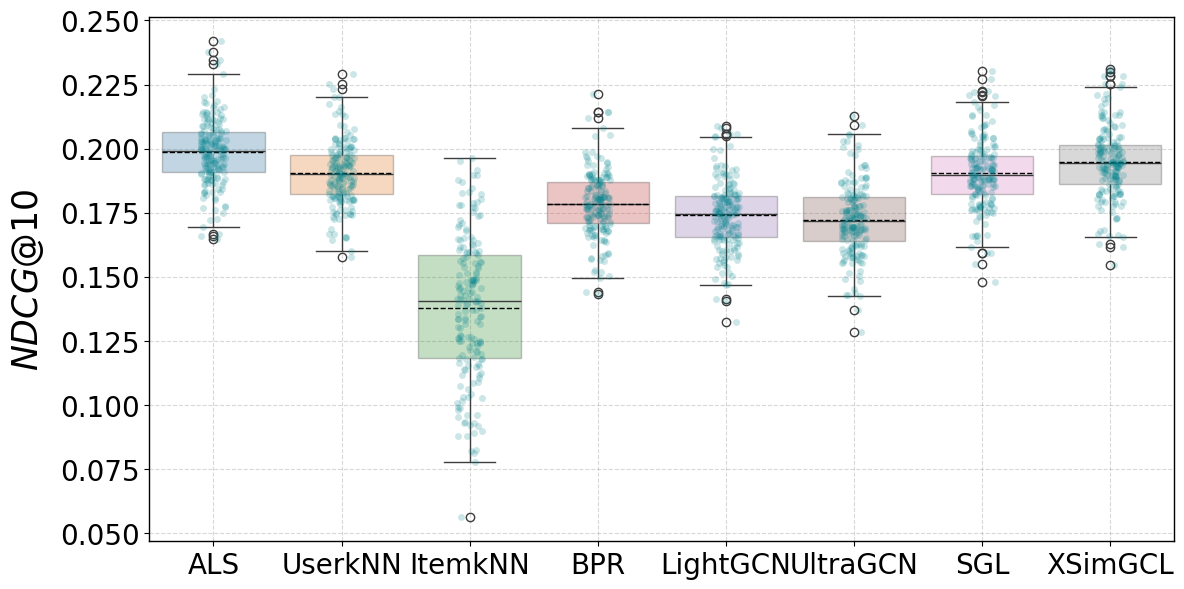

In [8]:
plot_metrics_by_dataset_with_boxplot(final_eval_df,  models_dict=filtered_model_dict, eval_run=EVAL_RUN, metric = "ndcg@10", save_fig = False, with_scatter=True)

100%|██████████| 176/176 [00:00<00:00, 19462.61rows/s]


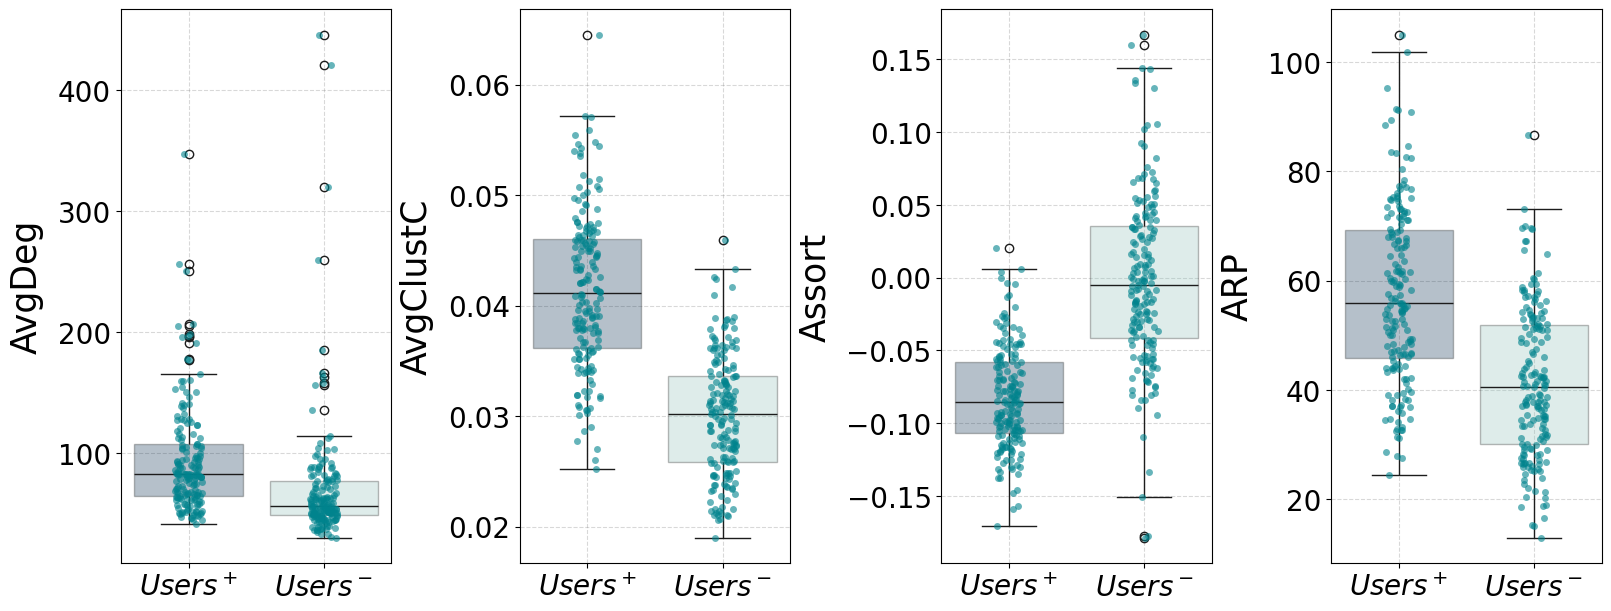

In [10]:
characteristics = ['node_degree', 'average_coefficients', 'degree_assort', 'average_popularity']
model = "XSimGCL"
plot_best_worst_characteristics(final_eval_df, model=model, characteristics=characteristics, eval_run=EVAL_RUN, num_datasets=final_eval_df[final_eval_df['Model']==model].shape[0], save_fig=False)

# 2. Plot Correlation of certain Characteristics and Metrics
- some metrics (accuracy and beyond-accuracy) are more and less correlated

<Figure size 1200x600 with 0 Axes>

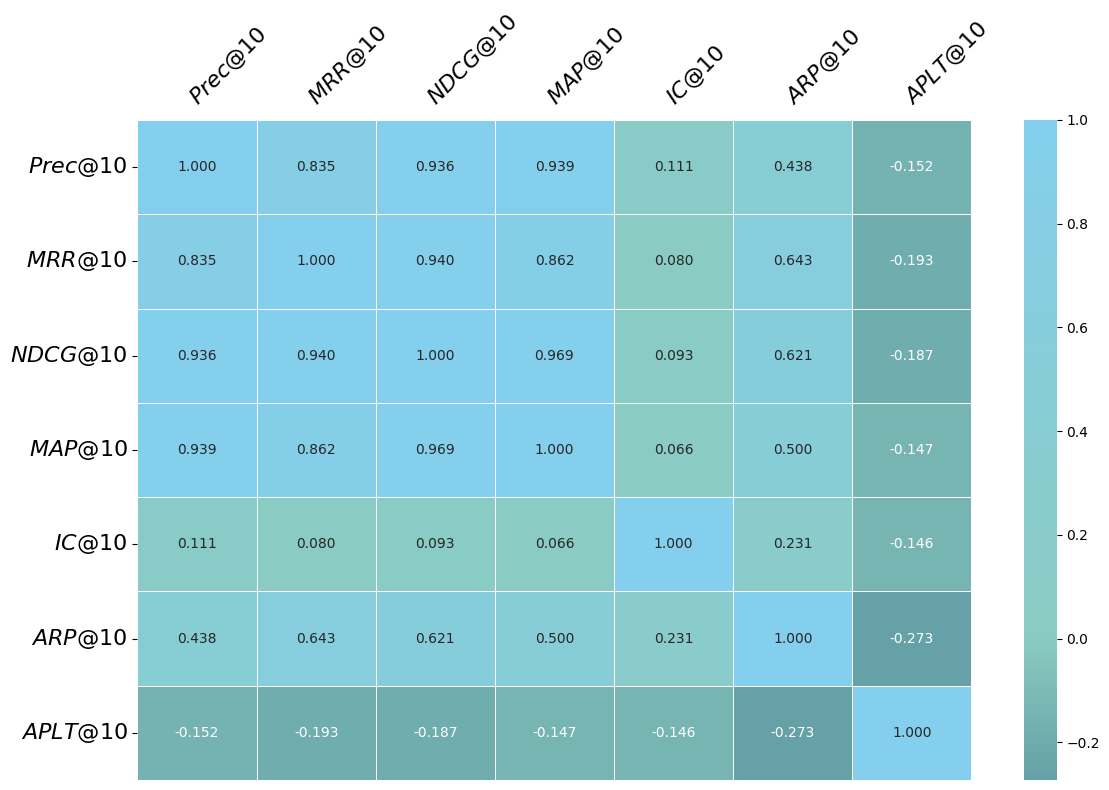

In [11]:
# Define custom labels for metrics and target metrics
metrics = ["precision@10", "mrr@10", "ndcg@10", "map@10", "itemcoverage@10", "averagepopularity@10","tailpercentage@10"]

metric_labels = {
    'best_users_mean_popularity_mean': '$ARP_U^+$',
    'best_users_median_popularity_mean': '$ARP_U+$ (Median)',
    'worst_users_mean_popularity_mean': '$ARP_U-$',
    'worst_users_median_popularity_mean': '$ARP_U-$ (Median)',
    'precision@10': "$Prec@10$",
    'mrr@10': "$MRR@10$",
    'ndcg@10': "$NDCG@10$",
    'map@10': "$MAP@10$",
    'itemcoverage@10': "$IC@10$",
    'averagepopularity@10': "$ARP@10$",
    'tailpercentage@10': "$APLT@10$",
}

plot_correlation_matrix(final_eval_df, models=['XSimGCL'], metric_labels=metric_labels, metrics=metrics, transformation="", save_fig=False, filename="heatmap_metrics")

<Figure size 1200x600 with 0 Axes>

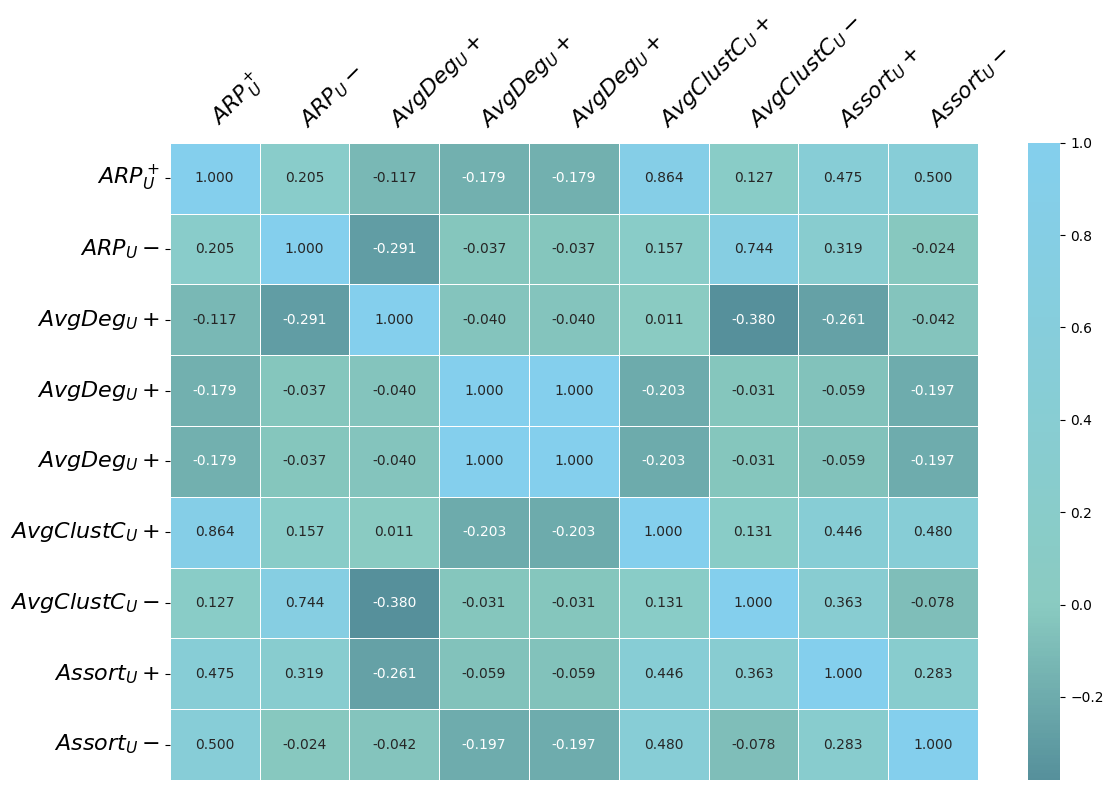

In [12]:
# Define custom labels for metrics and target metrics
metrics = ["best_users_mean_popularity_mean", "worst_users_mean_popularity_mean", "best_users_node_degree_mean", "worst_users_node_degree_mean","worst_users_node_degree_mean", "average_clustering_coef_dot_best_users", "average_clustering_coef_dot_worst_users", "degree_assort_best_users", "degree_assort_worst_users"]

metric_labels = {
    'best_users_mean_popularity_mean': '$ARP_U^+$',
    'best_users_median_popularity_mean': '$ARP_U+$ (Median)',
    'worst_users_mean_popularity_mean': '$ARP_U-$',
    'worst_users_median_popularity_mean': '$ARP_U-$ (Median)',
    'best_users_node_degree_mean': '$AvgDeg_U+$',
    'best_users_node_degree_median': '$AvgDeg_U+$ (Median)',
    'worst_users_node_degree_mean': '$AvgDeg_U+$',
    'worst_users_node_degree_median': ' $AvgDeg_U-$ (Median)',
    'average_clustering_coef_dot_best_users': '$AvgClustC_U+$',
    'average_clustering_coef_dot_worst_users': '$AvgClustC_U-$',
    'degree_assort_best_users': '$Assort_U+$',
    'degree_assort_worst_users': '$Assort_U-$',
}

plot_correlation_matrix(final_eval_df, models=['XSimGCL'], metric_labels=metric_labels, metrics=metrics, 
                        transformation='log', save_fig=False, filename="heatmap_worst_best_characteristics")

<Figure size 1200x600 with 0 Axes>

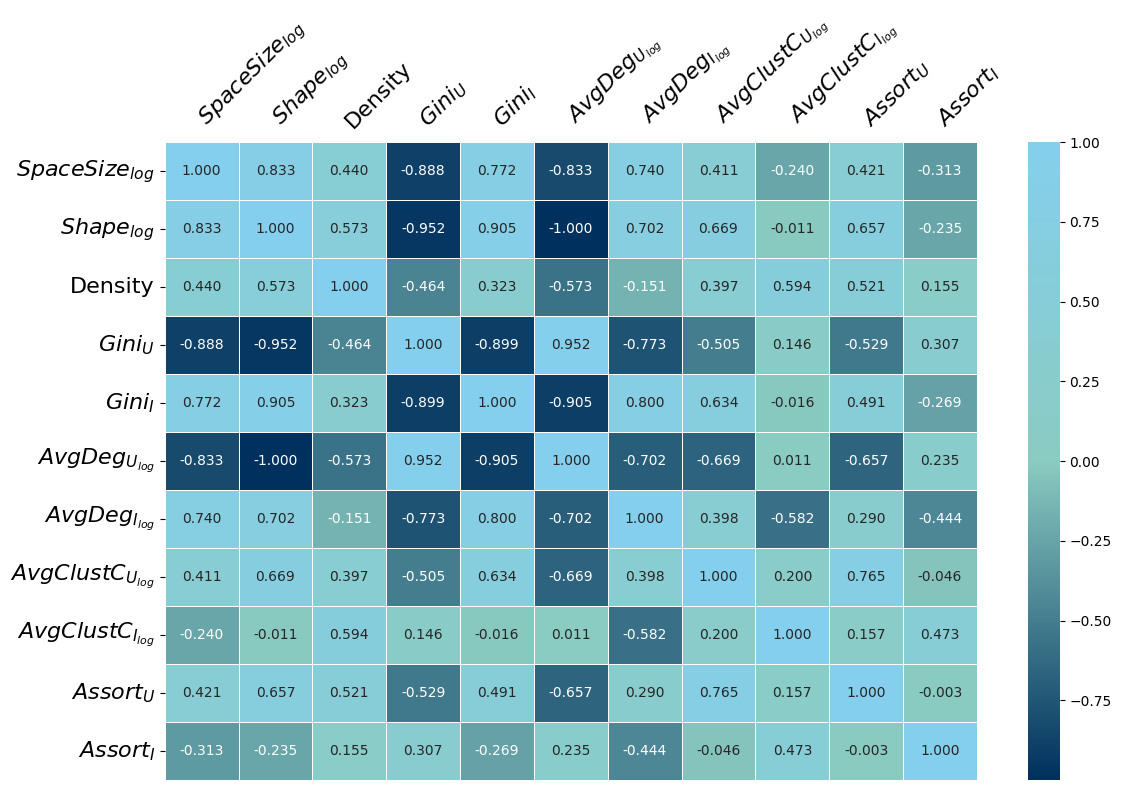

In [13]:
# Define custom labels for metrics and target metrics
metrics = ["space_size_log", "shape_log", "density", "gini_user", "gini_item", "average_degree_user_log", "average_degree_item_log", "average_clustering_coef_dot_user_log", "average_clustering_coef_dot_item_log", "degree_assort_user", "degree_assort_item"]

metric_labels = {'space_size_log' : '$SpaceSize_{log}$',
                   'shape_log' : '$Shape_{log}$',
                    'sparsity_log' : '$Sparsity_{log}$',
                   'gini_user' : '$Gini_U$',
                   'gini_item' : '$Gini_I$',
                   'average_degree_user_log' : '$AvgDeg_{U_{log}}$',
                   'average_degree_item_log' : '$AvgDeg_{I_{log}}$',
                   'average_clustering_coef_dot_user_log' : '$AvgClustC_{U_{log}}$',
                   'average_clustering_coef_dot_item_log' : '$AvgClustC_{I_{log}}$',
                   'degree_assort_user' : '$Assort_U$',
                   'degree_assort_item' : '$Assort_I$'}

plot_correlation_matrix(final_eval_df, models=['XSimGCL'],  metric_labels=metric_labels, metrics=metrics, 
                        transformation="", save_fig=False, filename="heatmap_dataset_characterisics")

# 3. Build Explanatory Model

- Use [statsmodels](https://www.statsmodels.org/stable/index.html) for the following analysis, providing a wide range of statistical models.
- Everything is bundled within `significance_test(...)`, allowing for the generation of plots or the storage of the resulting table `df_results` as a `.csv` file.
- The generated plots include:
    - **Theoretical quantiles vs. residuals**: A QQ-plot to assess the normality of residuals by comparing their distribution against theoretical quantiles.
    - **Fitted values vs. residuals**: A scatter plot visualizing the relationship between predicted values and residuals, helping to detect non-linearity, heteroscedasticity, or outliers.
    - **Influence analysis**: A visualization showing the adjusted $R^2$ and a bar chart, where the length of the bars represents the influence coefficient $\beta_C$, and the color indicates the corresponding $p$-value, providing insights into statistical significance.

<u>Linear Regression Model</u>:
- dataset characteristics (independent variable) $X_c$
- target metrics (dependend variabe) $y$
- influence on target metrics (regression coefficient) $\beta_c$ 

Model: $y=\beta_0 + \beta_c X_c + e$

where:

- $X_c \equiv \{SpaceSize, Shape, Density, Gini_U, Gini_I, AvgDeg_U, AvgDeg_I, AvgClustC_U, AvgClustC_I, Assort_U, Assort_I\}$
- $y \equiv \{NDCG@10, IC@10, ARP@10\}$

Null hypothesis: $H_0: \beta_c = 0, \quad H_1: \beta_c \neq 0$

The values of $\beta_c$ are represented by the **bar length**, while the **$p$-value** is indicated by the color.


                            OLS Regression Results                            
Dep. Variable:           XSimGCL_ndcg   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     55.10
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           2.53e-45
Time:                        10:20:59   Log-Likelihood:                 622.78
No. Observations:                 176   AIC:                            -1226.
Df Residuals:                     166   BIC:                            -1194.
Df Model:                           9                                         
Covariance Type:                  HC1                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


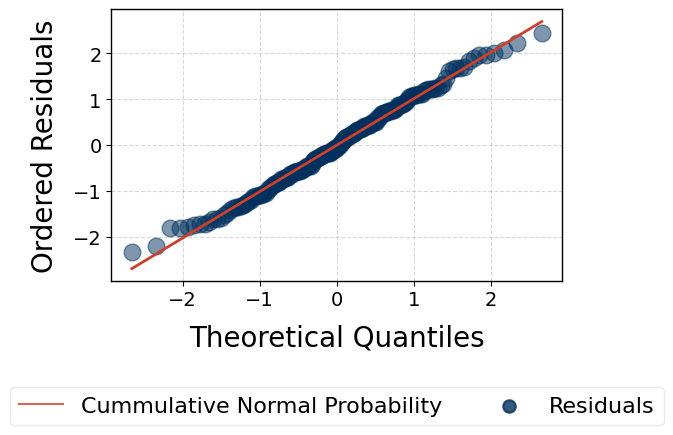

<class 'pandas.core.series.Series'>


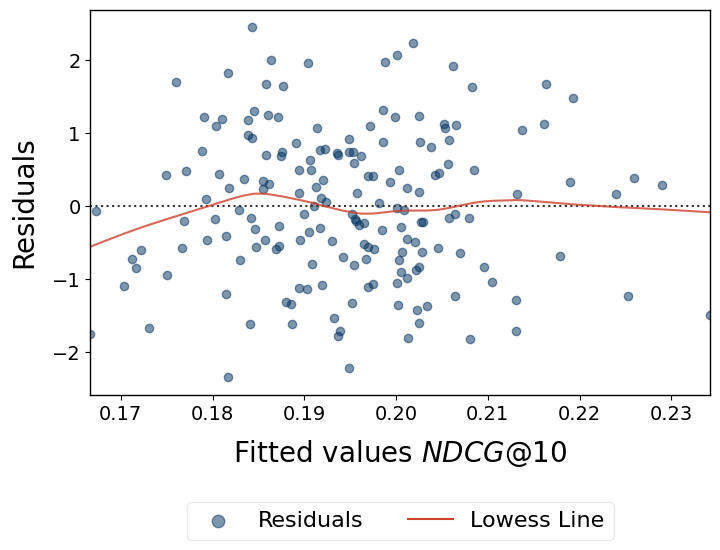

                             OLS Regression Results                             
Dep. Variable:     XSimGCL_itemcoverage   R-squared:                       0.813
Model:                              OLS   Adj. R-squared:                  0.803
Method:                   Least Squares   F-statistic:                     81.25
Date:                  Sun, 16 Feb 2025   Prob (F-statistic):           3.64e-56
Time:                          10:20:59   Log-Likelihood:                 660.54
No. Observations:                   176   AIC:                            -1301.
Df Residuals:                       166   BIC:                            -1269.
Df Model:                             9                                         
Covariance Type:                    HC1                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

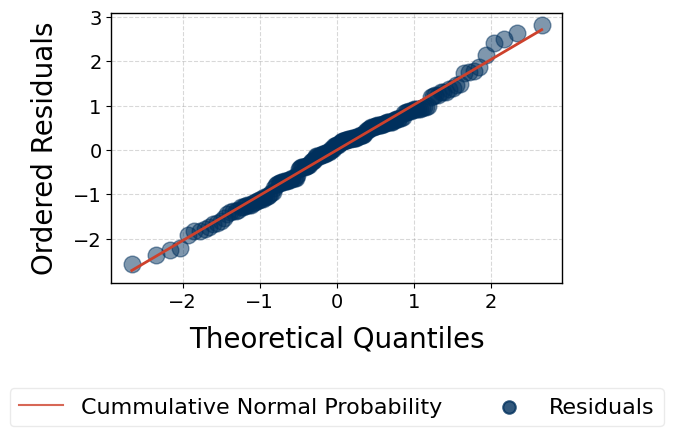

<class 'pandas.core.series.Series'>


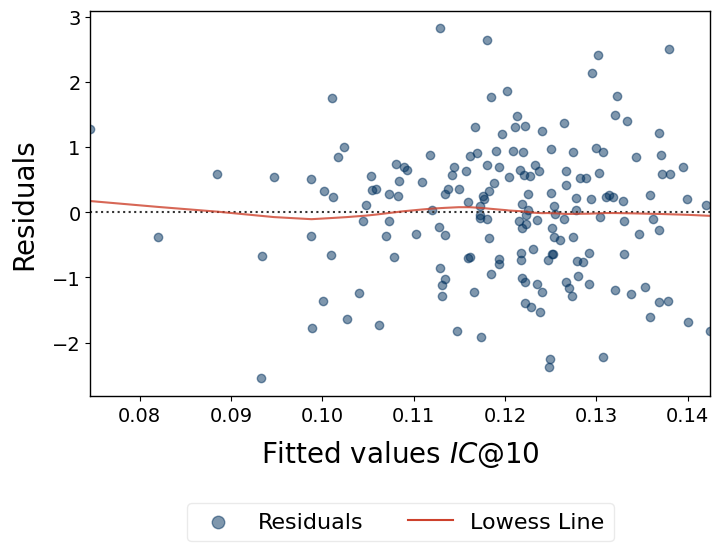

                                OLS Regression Results                               
Dep. Variable:     XSimGCL_averagepopularity   R-squared:                       0.907
Model:                                   OLS   Adj. R-squared:                  0.902
Method:                        Least Squares   F-statistic:                     167.0
Date:                       Sun, 16 Feb 2025   Prob (F-statistic):           2.23e-78
Time:                               10:21:00   Log-Likelihood:                -466.99
No. Observations:                        176   AIC:                             954.0
Df Residuals:                            166   BIC:                             985.7
Df Model:                                  9                                         
Covariance Type:                         HC1                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

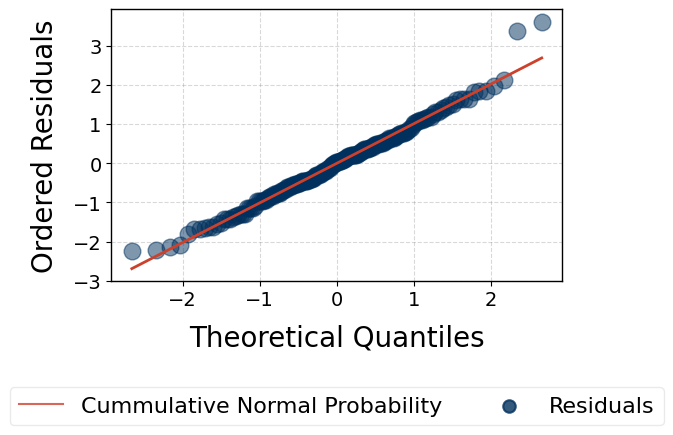

<class 'pandas.core.series.Series'>


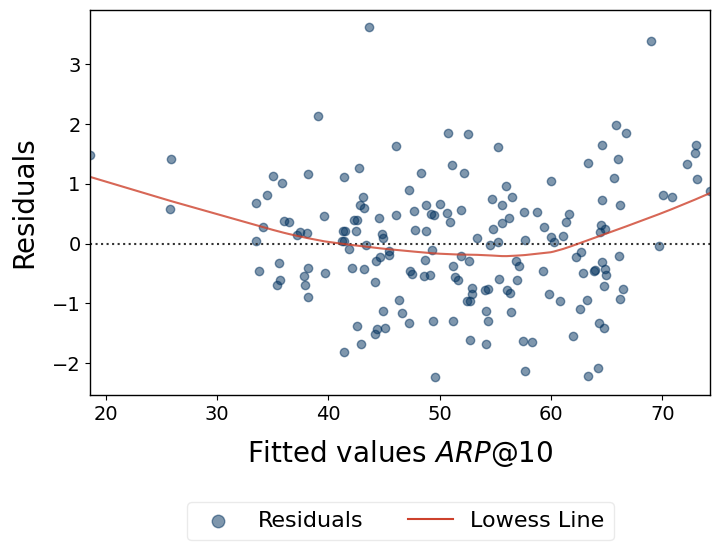

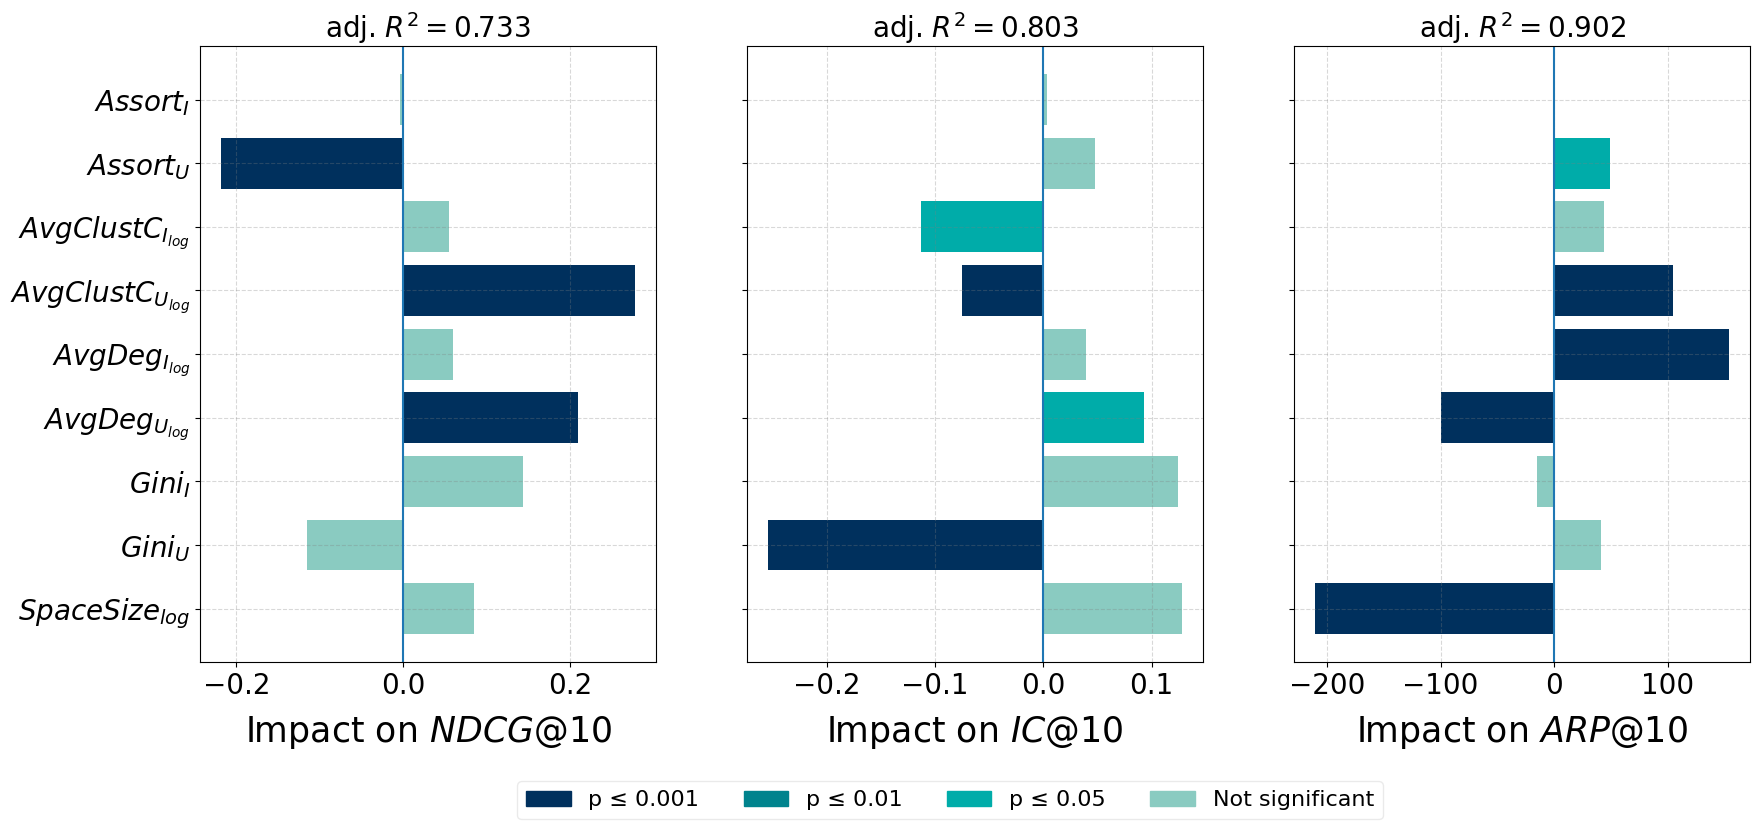

In [16]:
# SpaceSize & (Shape or Sparsity) led to strong multicollinearity!
characteristics = {'space_size_log' : '$SpaceSize_{log}$',
                   #'shape' : '$Shape$', 
                   #'sparsity' : '$Sparsity_{log}$',
                   'gini_user' : '$Gini_U$',
                   'gini_item' : '$Gini_I$',
                   'average_degree_user_log' : '$AvgDeg_{U_{log}}$',
                   'average_degree_item_log' : '$AvgDeg_{I_{log}}$',
                   'average_clustering_coef_dot_user_log' : '$AvgClustC_{U_{log}}$',
                   'average_clustering_coef_dot_item_log' : '$AvgClustC_{I_{log}}$',
                   'degree_assort_user' : '$Assort_U$',
                   'degree_assort_item' : '$Assort_I$'
                    }

#### ENTIRE ANALYSIS MODELS ####
models = list(filtered_model_dict.keys())
metrics_dict = {'ndcg' : '$NDCG@10$', 'itemcoverage' : '$IC@10$', 'averagepopularity' : '$ARP@10$', 'tailpercentage' : '$APLT@10$'}

#### Exemplary for Testing ####
models = ["XSimGCL"]
metrics_dict = {'ndcg' : '$NDCG@10$', 'itemcoverage' : '$IC@10$', 'averagepopularity' : '$ARP@10$'}

df_results = significance_test(df=final_eval_df, eval_run = EVAL_RUN,
                               characteristics=characteristics, models=models, metrics=metrics_dict, 
                               transformation="", transform_target="", 
                               save_as_csv=False, create_plots=True, show_plots=True, save_figs=False)

In [17]:
df_results

,model,metric,score,adjusted_score,Intercept,space_size_log,gini_user,gini_item,average_degree_user_log,average_degree_item_log,...,p_Intercept,p_space_size_log,p_gini_user,p_gini_item,p_average_degree_user_log,p_average_degree_item_log,p_average_clustering_coef_dot_user_log,p_average_clustering_coef_dot_item_log,p_degree_assort_user,p_degree_assort_item
0,XSimGCL,ndcg,0.746448,0.732702,0.194740,0.084458,-0.115887,0.143559,0.210017,0.060302,...,0.0,0.410971,0.149701,0.201853,0.000255,0.549191,7.698876e-35,0.298930,3.641884e-09,0.321627
1,XSimGCL,itemcoverage,0.813449,0.803335,0.120137,0.128321,-0.254662,0.123965,0.092869,0.039331,...,0.0,0.183388,0.000020,0.235197,0.043243,0.695036,7.934472e-04,0.023724,1.900954e-01,0.250558
2,XSimGCL,averagepopularity,0.907345,0.902321,51.662866,-210.498785,40.619314,-15.570908,-99.507239,153.871525,...,0.0,0.000046,0.241111,0.767391,0.000107,0.000862,2.301042e-22,0.076344,2.126476e-02,0.598277
